In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
ds = xr.open_dataset("cam_vcoords_L32_c180105.nc")

In cam pressures at each hybrid level using the formula: $p(k) = a(k)p0 + b(k)ps$
Some models output a hybrid component, $ap(k) [=a(k)p0]$, which has units of pressure. This must be made dimensionless prior to use. $lev = 1000.(ds.hybm+ds.hyam)$ (1000 is $p0$ in hPa)

In [3]:
ds

<xarray.Dataset>
Dimensions:  (scalar: 1, ilev: 33, lev: 32, lat: 384, lon: 576, slat: 383, slon: 576)
Coordinates:
  * ilev     (ilev) float64 2.255 5.032 10.16 18.56 ... 947.4 967.5 985.1 1e+03
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * lat      (lat) float64 -90.0 -89.53 -89.06 -88.59 ... 88.59 89.06 89.53 90.0
  * lon      (lon) float64 0.0 0.625 1.25 1.875 2.5 ... 357.5 358.1 358.8 359.4
  * slat     (slat) float64 -89.77 -89.3 -88.83 -88.36 ... 88.83 89.3 89.77
  * slon     (slon) float64 -0.3125 0.3125 0.9375 1.562 ... 357.8 358.4 359.1
Dimensions without coordinates: scalar
Data variables:
    P0       (scalar) float64 ...
    hyai     (ilev) float64 ...
    hyam     (lev) float64 ...
    hybi     (ilev) float64 ...
    hybm     (lev) float64 ...
Attributes: (12/30)
    Conventions:                CF-1.0
    Description:                Re-gridded CAM Initial Conditions from the fo...
    source1:                    /glade/p/umia0018/FC5AQUAP_sstQobs_1degFV_nco...
    source_lev_info:            /glade/p/cesmdata/cseg/inputdata/atm/cam/inic...
    hybrid_sigma_pressure:      p(i,j,k) = A(k)*PO + B(k)*PS(i,j)
    logname:                    tilmes
    ...                         ...
    Version:                    $Name$
    revision_Id:                $Id$
    initial_file:               /glade/p/acd/tilmes/inputdata/init/cesm2/f.e2...
    topography_file:            /glade/p/acd/tilmes/inputdata/topo/fv_0.47x0....
    time_period_freq:           day_1
    history_of_appended_files:  Mon Mar 23 10:25:40 2020: Appended file fv_0....

In [4]:
dsm = xr.open_dataset("mars_grid.nc")

In [5]:
dsm

<xarray.Dataset>
Dimensions:   (altitude: 49, interlayer: 50)
Coordinates:
  * altitude  (altitude) float64 0.004481 0.02354 0.07477 ... 227.3 234.3 241.3
Dimensions without coordinates: interlayer
Data variables:
    ap        (interlayer) float32 ...
    aps       (altitude) float32 ...
    bp        (interlayer) float32 ...
    bps       (altitude) float32 ...
Attributes:
    history:  Thu Mar 17 12:56:41 2022: ncks -O -vaps,bps,ap,bp LMD_MARS_Mg_M...
    NCO:      netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, C...

In [6]:
P0 = 610. # Pa

outfile = "mars_cam_vcoords_L32_c220317.nc"
# hybrid pressure at interlayers
hyai = dsm.ap.values[32::-1]/P0 
hybi = dsm.bp.values[32::-1]

# hybrid pressure at midlayers
hyam = dsm.aps.values[31::-1]/P0
hybm = dsm.bps.values[31::-1]

outfile = "mars_cam_vcoords_L49_c220318.nc"
# hybrid pressure at interlayers
hyai = dsm.ap.values[::-1]/P0 
hybi = dsm.bp.values[::-1]

# hybrid pressure at midlayers
hyam = dsm.aps.values[::-1]/P0
hybm = dsm.bps.values[::-1]

This vertical coordinate is a hybrid coordinate in which vertical levels $l$ are at pressure $P$ :
$P (l) = aps(l) + bps(l) × PS$
where $PS$ is surface pressure. Coefficients $aps(l)$ and $bps(l)$ are respectively hybrid pressure and hybrid sigma levels. In its present form the database extends over 49 levels. computed using a surface pressure of 610 Pa.

In [7]:
lev = (hyam + hybm)*P0*1e-2 
ilev = (hyai + hybi)*P0*1e-2 

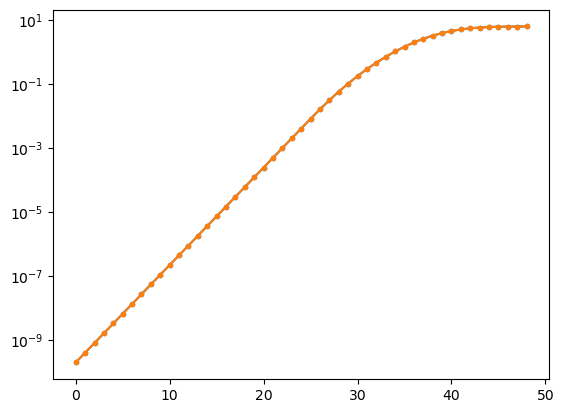

In [10]:
plt.semilogy(lev, marker='.')
plt.show()

In [11]:
print(lev)

[2.02226361e-10 4.07233858e-10 8.20068236e-10 1.65141467e-09
 3.32554095e-09 6.69681688e-09 1.34857334e-08 2.71569309e-08
 5.46873480e-08 1.10126791e-07 2.21768104e-07 4.46586142e-07
 8.99314102e-07 1.81099620e-06 3.64689868e-06 7.34395144e-06
 1.47889014e-05 2.97811948e-05 5.99719569e-05 1.20768695e-04
 2.43198272e-04 4.89741156e-04 9.86217638e-04 1.98599836e-03
 3.99930961e-03 8.03568680e-03 1.58982109e-02 3.05543765e-02
 5.66468425e-02 1.01035595e-01 1.73268110e-01 2.85702080e-01
 4.52961445e-01 6.90502405e-01 1.01210725e+00 1.42642748e+00
 1.93302023e+00 2.51876283e+00 3.15577507e+00 3.80183554e+00
 4.40826941e+00 4.93350649e+00 5.35186338e+00 5.65744019e+00
 5.86216211e+00 5.98701143e+00 6.05455971e+00 6.08565712e+00
 6.09726715e+00]


In [12]:
print(ilev)

[0.0000000e+00 2.7025035e-10 5.4421734e-10 1.0959192e-09 2.2069102e-09
 4.4441717e-09 8.9494625e-09 1.8022003e-08 3.6291858e-08 7.3082830e-08
 1.4717075e-07 2.9636547e-07 5.9680684e-07 1.2018213e-06 2.4201709e-06
 4.8736256e-06 9.8142773e-06 1.9763525e-05 3.9798855e-05 8.0145059e-05
 1.6139231e-04 3.2500422e-04 6.5447815e-04 1.3179572e-03 2.6540398e-03
 5.3445799e-03 1.0726794e-02 2.1069629e-02 4.0039130e-02 7.3254555e-02
 1.2881663e-01 2.1771955e-01 3.5368457e-01 5.5223840e-01 8.2876641e-01
 1.1954480e+00 1.6574069e+00 2.2086339e+00 2.8288915e+00 3.4826584e+00
 4.1210127e+00 4.6955256e+00 5.1714869e+00 5.5322399e+00 5.7826409e+00
 5.9416833e+00 6.0323400e+00 6.0767789e+00 6.0945349e+00 6.0999999e+00]


In [13]:
dsout = xr.Dataset({
    'P0': xr.DataArray(
        data = P0,
        attrs = {
            'long_name': 'reference pressure',
            'units': 'Pa'
            }
        ),
    'hyai': xr.DataArray(
                data   = hyai,  
                dims   = ['ilev'],
                coords = {'ilev': ilev},
                attrs  = {
                    'long_name': 'hybrid A coefficient at layer interfaces'
                    }
                ),
    'hybi': xr.DataArray(
                data   = hybi,  
                dims   = ['ilev'],
                coords = {'ilev': ilev},
                attrs  = {
                    'long_name': 'hybrid B coefficient at layer interfaces'
                    }
                ),
    'hyam': xr.DataArray(
                data   = hyam,  
                dims   = ['lev'],
                coords = {'lev': lev},
                attrs  = {
                    'long_name': 'hybrid A coefficient at layer midpoints'
                    }
                ),
    'hybm': xr.DataArray(
                data   = hybm,  
                dims   = ['lev'],
                coords = {'lev': lev},
                attrs  = {
                    'long_name': 'hybrid B coefficient at layer midpoints'
                    }
                )
            },
     attrs = {'hybrid_sigma_pressure': 'p(i,j,k) = A(k)*PO + B(k)*PS(i,j)',
              'author': 'Dan Marsh',
              'created': '2002-03-17',
              'original grid source': 'MARS CLIMATE DATABASE v5.3'
             }
    )
dsout['lev'].attrs['long_name']="hybrid level at midpoints (p0*1e-2*(A+B))"
dsout['lev'].attrs['formula_terms']="A: hyam B: hybm p0: P0"
dsout['lev'].attrs['units']="hPa"

dsout['ilev'].attrs['long_name']="hybrid level at interfaces (p0*1e-2*(A+B))"
dsout['ilev'].attrs['formula_terms']="A: hyai B: hybi p0: P0"
dsout['ilev'].attrs['units']="hPa"


In [14]:
dsout

<xarray.Dataset>
Dimensions:  (ilev: 50, lev: 49)
Coordinates:
  * ilev     (ilev) float32 0.0 2.703e-10 5.442e-10 ... 6.077 6.095 6.1
  * lev      (lev) float32 2.022e-10 4.072e-10 8.201e-10 ... 6.055 6.086 6.097
Data variables:
    P0       float64 610.0
    hyai     (ilev) float32 0.0 4.43e-11 8.922e-11 ... 6.351e-05 1.494e-05 0.0
    hybi     (ilev) float32 0.0 0.0 0.0 0.0 0.0 ... 0.9887 0.9961 0.9991 1.0
    hyam     (lev) float32 3.315e-11 6.676e-11 1.344e-10 ... 3.922e-05 7.468e-06
    hybm     (lev) float32 0.0 0.0 0.0 0.0 0.0 ... 0.9812 0.9924 0.9976 0.9995
Attributes:
    hybrid_sigma_pressure:  p(i,j,k) = A(k)*PO + B(k)*PS(i,j)
    author:                 Dan Marsh
    created:                2002-03-17
    original grid source:   MARS CLIMATE DATABASE v5.3

In [15]:
dsout.to_netcdf(outfile)

In [16]:
!ncdump mars_cam_vcoords_L49_c220318.nc

netcdf mars_cam_vcoords_L49_c220318 {
dimensions:
	ilev = 50 ;
	lev = 49 ;
variables:
	double P0 ;
		P0:_FillValue = NaN ;
		P0:long_name = "reference pressure" ;
		P0:units = "Pa" ;
	float ilev(ilev) ;
		ilev:_FillValue = NaNf ;
		ilev:long_name = "hybrid level at interfaces (p0*1e-2*(A+B))" ;
		ilev:formula_terms = "A: hyai B: hybi p0: P0" ;
		ilev:units = "hPa" ;
	float hyai(ilev) ;
		hyai:_FillValue = NaNf ;
		hyai:long_name = "hybrid A coefficient at layer interfaces" ;
	float hybi(ilev) ;
		hybi:_FillValue = NaNf ;
		hybi:long_name = "hybrid B coefficient at layer interfaces" ;
	float lev(lev) ;
		lev:_FillValue = NaNf ;
		lev:long_name = "hybrid level at midpoints (p0*1e-2*(A+B))" ;
		lev:formula_terms = "A: hyam B: hybm p0: P0" ;
		lev:units = "hPa" ;
	float hyam(lev) ;
		hyam:_FillValue = NaNf ;
		hyam:long_name = "hybrid A coefficient at layer midpoints" ;
	float hybm(lev) ;
		hybm:_FillValue = NaNf ;
		hybm:long_name = "hybrid B coefficient at layer midpoints" ;

// global a